# Homework 1: Neural Networks Construction

## Loading libraries

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

## Question 1

In [14]:
# Creating a loop to change the size first layer
sizes = [16, 32, 64, 128, 256, 512]
acc = []
for size in sizes:
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    train_images = train_images.reshape((60000, 28 * 28))
    train_images = train_images.astype("float32") / 255
    test_images = test_images.reshape((10000, 28 * 28))
    test_images = test_images.astype("float32") / 255


    model = keras.Sequential([
            layers.Dense(size, activation="relu"),
            layers.Dense(10, activation="softmax")
        ])

    model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])
    model.fit(train_images, train_labels, epochs=5, batch_size=128)
    test_digits = test_images[0:10]
    predictions = model.predict(test_digits)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"test_acc: {test_acc}")
    acc.append(test_acc)

Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.5670 - accuracy: 0.8485
Epoch 2/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2983 - accuracy: 0.9158
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.2651 - accuracy: 0.9251
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2448 - accuracy: 0.9310
Epoch 5/5
313/313 [==============================] - 0s 904us/step - loss: 0.2279 - accuracy: 0.9346
test_acc: 0.9345999956130981
Epoch 1/5
469/469 [==============================] - 1s 1ms/step - loss: 0.4739 - accuracy: 0.8752
Epoch 2/5
469/469 [==============================] - 1s 2ms/step - loss: 0.2402 - accuracy: 0.9318
Epoch 3/5
469/469 [==============================] - 1s 1ms/step - loss: 0.1960 - accuracy: 0.9447
Epoch 4/5
469/469 [==============================] - 1s 2ms/step - loss: 0.1695 - accuracy: 0.9511
Epoch 5/5
313/313 [==============================] - 0s 985us/step - loss: 0.1

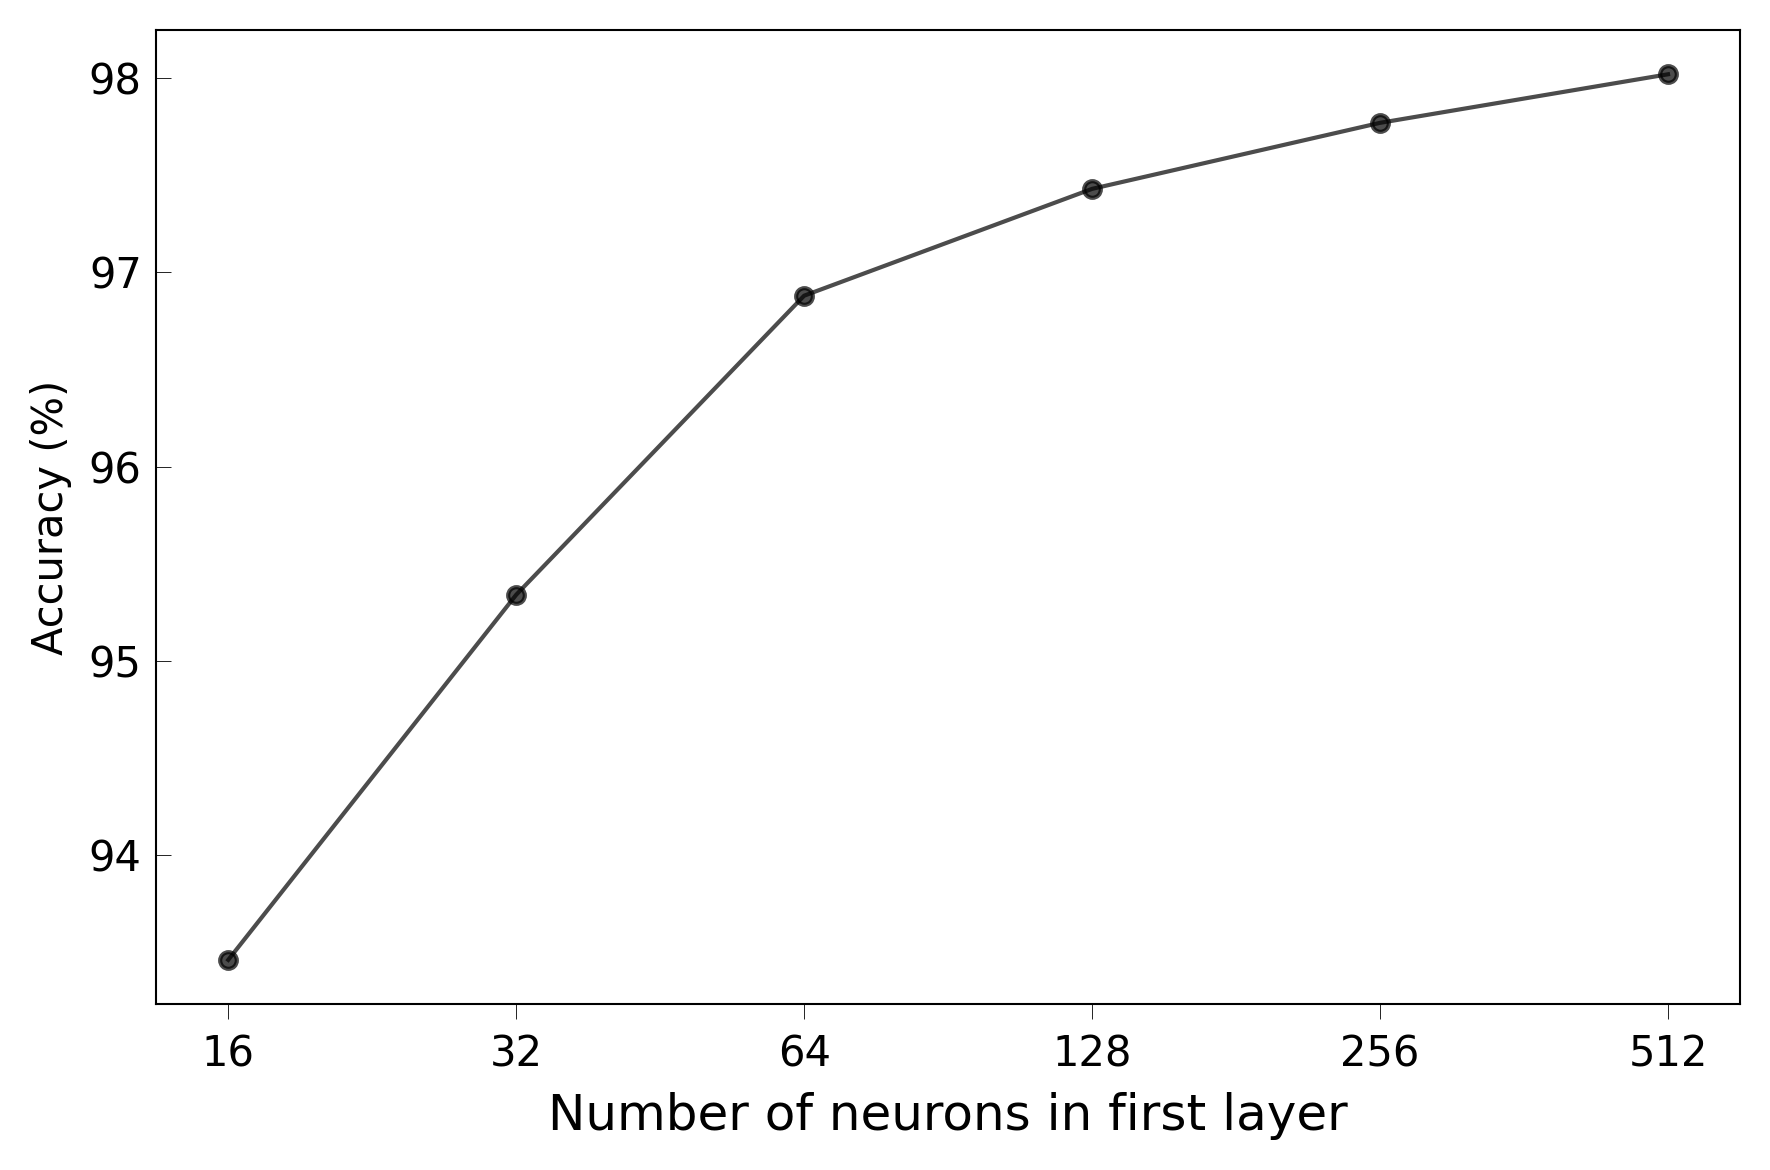

In [40]:
# Create the figure
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=300)  # Adjusted figure size

# Plot the data with error bars
ax1.plot([i for i in range(len(acc))], [i*100 for i in acc], color='black', label=f'Accuracy', linewidth=1, marker='o', markersize=4, alpha=0.7)

# Set axis labels and font
ax1.set_xlabel('Number of neurons in first layer', fontsize=12)  # Adjusted font size
ax1.set_ylabel('Accuracy (%)', fontsize=10, color='black')  # Adjusted font size
ax1.tick_params(axis='y', labelcolor='black', labelsize=10)  # Adjusted font size

# set x axis ticks labels to sizes 
ax1.set_xticks([i for i in range(len(sizes))])
ax1.set_xticklabels(sizes)
# # Set y-axis ticks direction to 'in' for both axes
ax1.yaxis.set_tick_params(direction='in')

# Make the plot frame thinner
ax1.spines['top'].set_linewidth(0.5)
ax1.spines['right'].set_linewidth(0.5)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)
# Adjust the size and thickness of ticks
ax1.tick_params(axis='both', which='major', labelsize=10, width=0.2)  # Adjusted font size

plt.tight_layout()  # Ensures the plot fits within the figure size
plt.show()


## Question 2

In [46]:
# Creating a loop to change the size first layer

num_layers = [2,3,4,5]
acc2 = []
for num in num_layers:
    (train_images, train_labels), (test_images, test_labels) = mnist.load_data()
    train_images = train_images.reshape((60000, 28 * 28))
    train_images = train_images.astype("float32") / 255
    test_images = test_images.reshape((10000, 28 * 28))
    test_images = test_images.astype("float32") / 255

    layers = []
    for i in range(num-1):
        layers.append(keras.layers.Dense(512, activation="relu"))   
    layers.append(keras.layers.Dense(10, activation="softmax"))

    model = keras.Sequential(layers)

    model.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

    model.fit(train_images, train_labels, epochs=5, batch_size=128)
    test_digits = test_images[0:10]
    predictions = model.predict(test_digits)
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print(f"test_acc: {test_acc}")
    acc2.append(test_acc)
    model.summary()  # Print the model summary

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.2660 - accuracy: 0.9229
Epoch 2/5
469/469 [==============================] - 2s 3ms/step - loss: 0.1090 - accuracy: 0.9679
Epoch 3/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0721 - accuracy: 0.9785
Epoch 4/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0522 - accuracy: 0.9844
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.0702 - accuracy: 0.9780
test_acc: 0.9779999852180481
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_87 (Dense)            (None, 512)               401920    
                                                                 
 dense_88 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-train

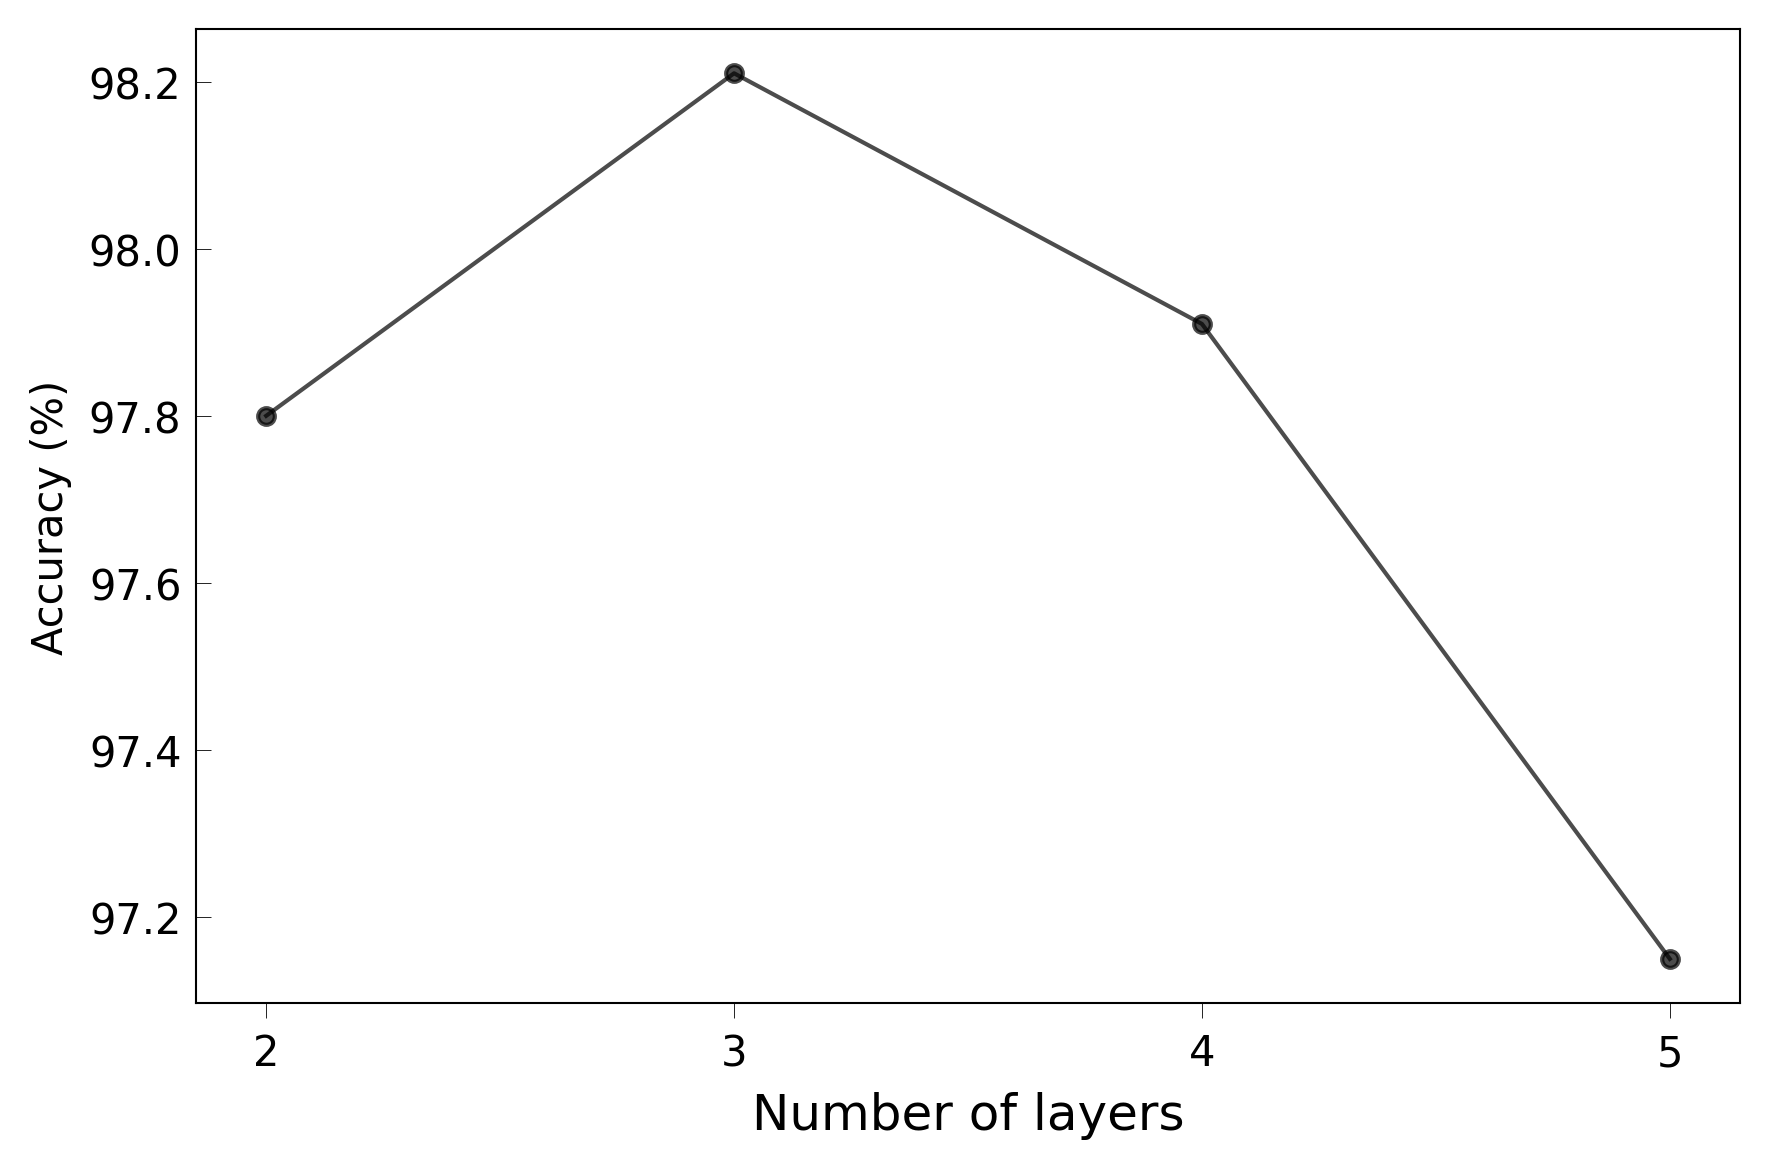

In [47]:
# Create the figure
fig, ax1 = plt.subplots(figsize=(6, 4), dpi=300)  # Adjusted figure size

# Plot the data with error bars
ax1.plot([i for i in range(len(acc2))], [i*100 for i in acc2], color='black', label=f'Accuracy', linewidth=1, marker='o', markersize=4, alpha=0.7)

# Set axis labels and font
ax1.set_xlabel('Number of layers', fontsize=12)  # Adjusted font size
ax1.set_ylabel('Accuracy (%)', fontsize=10, color='black')  # Adjusted font size
ax1.tick_params(axis='y', labelcolor='black', labelsize=10)  # Adjusted font size

# set x axis ticks labels to sizes 
ax1.set_xticks([i for i in range(len(acc2))])
ax1.set_xticklabels(num_layers)
# # Set y-axis ticks direction to 'in' for both axes
ax1.yaxis.set_tick_params(direction='in')

# Make the plot frame thinner
ax1.spines['top'].set_linewidth(0.5)
ax1.spines['right'].set_linewidth(0.5)
ax1.spines['bottom'].set_linewidth(0.5)
ax1.spines['left'].set_linewidth(0.5)
# Adjust the size and thickness of ticks
ax1.tick_params(axis='both', which='major', labelsize=10, width=0.2)  # Adjusted font size

plt.tight_layout()  # Ensures the plot fits within the figure size
plt.show()
